In [ ]:
from google.colab import drive # 패키지 불러오기 

drive.mount("/content/drive"  )    # 드라이브 기본 경로

Mounted at /content/drive


In [ ]:
# 라이브러리를 로드합니다.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# 폰트 설정이 잘 안 된다면 해당 셀의 마지막 줄 주석을 풀고 실행해 보세요.
# colab 사용시에도 아래 함수를 활용해 보세요.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


파일로드

In [ ]:
# 파일을 로드합니다.

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/socar_haketon/경기도 행복주택주거지현황_update.csv")
df.shape

(95, 6)

컬럼명만 보기

In [ ]:
# 컬럼값만 보기
df.columns

Index(['지역', '단지', '세대수', '주소', '위도', '경도'], dtype='object')

info

In [ ]:
# info 로 데이터프레임의 정보보기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      95 non-null     object 
 1   단지      95 non-null     object 
 2   세대수     95 non-null     int64  
 3   주소      95 non-null     object 
 4   위도      95 non-null     float64
 5   경도      95 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ KB


결측치 확인하기

In [ ]:
df.isnull().sum()

지역     0
단지     0
세대수    0
주소     0
위도     0
경도     0
dtype: int64

행, 열을 기준으로 값을 가져오기

In [ ]:
df


,지역,단지,세대수,주소,위도,경도
0,고양시 덕양구,삼송11단지,832,경기도 고양시 덕양구 원흥1로 25,37.650992,126.865491
1,고양시 덕양구,고양지축 A-1블록 신혼희망타운 행복주택,250,경기도 고양시 덕양구 오부자로 99,37.653331,126.921037
2,고양시 덕양구,고양지축 A-4BL 행복주택,473,경기도 고양시 덕양구 오부자로 43,37.654038,126.914946
3,고양시 덕양구,고양삼송 LH원흥마을13단지,947,경기도 고양시 덕양구 원흥1로 35,37.652631,126.868888
4,고양시 덕양구,서정마을LH12단지,276,경기도 고양시 덕양구 서정마을2로 17,37.621215,126.847648
...,...,...,...,...,...,...
90,화성시,남양뉴타운 B-10블록 행복·국민·영구임대주택,696,경기도 화성시 남양읍 남양중앙로 419,37.203932,126.841439
91,화성시,화성동탄2 지원6-2블록 지역전략산업지원주택,280,경기도 화성시 동탄첨단산업1로 57,37.214617,127.091352
92,화성시,화성동탄2 A82블럭(28단지)(행복),820,경기도 화성시 동탄순환대로2길 13,37.163534,127.094471
93,화성시,화성동탄2 A77-1블럭(35단지)(행복),900,경기도 화성시 동탄순환대로10길 42,37.166325,127.121699


In [ ]:
# "지역" 컬럼만 가져옵니다.
df['지역']

0     고양시 덕양구
1     고양시 덕양구
2     고양시 덕양구
3     고양시 덕양구
4     고양시 덕양구
       ...   
90        화성시
91        화성시
92        화성시
93        화성시
94        화성시
Name: 지역, Length: 95, dtype: object

In [ ]:
# "지역", "세대수" 2개의 컬럼을 가져옵니다. pandas에서 2개이상의 컬럼을 가지고 올때 리스트형태로 가져오면 data frame혙태
df[['지역', '세대수']]

,지역,세대수
0,고양시 덕양구,832
1,고양시 덕양구,250
2,고양시 덕양구,473
3,고양시 덕양구,947
4,고양시 덕양구,276
...,...,...
90,화성시,696
91,화성시,280
92,화성시,820
93,화성시,900


행 기준으로 불러오기

In [ ]:
# 0 번째 인덱스 행을 가져옵니다.
df.loc[0]

지역                 고양시 덕양구
단지                  삼송11단지
세대수                    832
주소     경기도 고양시 덕양구 원흥1로 25
위도               37.650992
경도              126.865491
Name: 0, dtype: object

위도ㅡ경도 0 인 행 삭제

In [ ]:
df = df.drop(index=df.loc[df.위도 == 0].index)
df.head(3)

,지역,단지,세대수,주소,위도,경도
0,고양시 덕양구,삼송11단지,832,경기도 고양시 덕양구 원흥1로 25,37.650992,126.865491
1,고양시 덕양구,고양지축 A-1블록 신혼희망타운 행복주택,250,경기도 고양시 덕양구 오부자로 99,37.653331,126.921037
2,고양시 덕양구,고양지축 A-4BL 행복주택,473,경기도 고양시 덕양구 오부자로 43,37.654038,126.914946


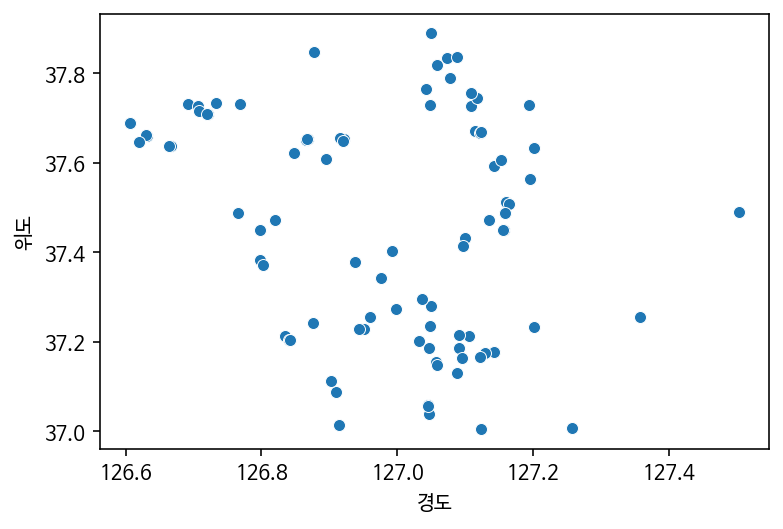

In [ ]:
sns.scatterplot(data=df, x="경도", y="위도")

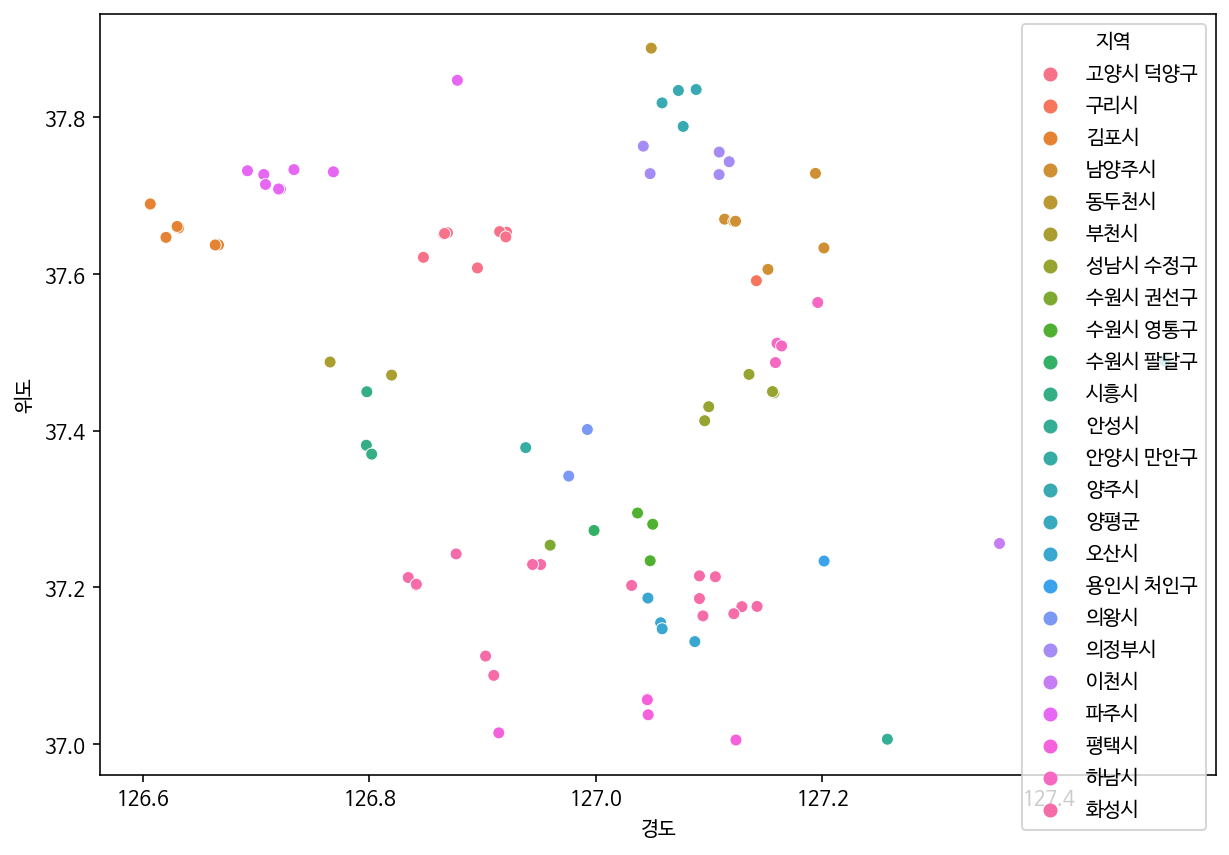

In [ ]:
# scatterplot 으로 경도와 위도를 표현하고 지역으로 색상을 다르게 표현합니다.
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="경도", y="위도", hue="지역")

Folium

In [ ]:
import folium 

In [ ]:
long = df["경도"].mean()
lat = df["위도"].mean()

In [ ]:
m = folium.Map(location=[lat, long], zoom_start=12, 
    tiles='Stamen Toner')

for i in df.index[:]:
    tooltip = df.loc[i, "단지"] +"-"+ df.loc[i, "주소"]
    lat = df.loc[i, "위도"]
    long = df.loc[i, "경도"]
    
    folium.CircleMarker([lat, long], tooltip=tooltip, radius=3).add_to(m)

m

In [94]:
df

,지역,단지,세대수,주소,위도,경도
0,고양시 덕양구,삼송11단지,832,경기도 고양시 덕양구 원흥1로 25,37.650992,126.865491
1,고양시 덕양구,고양지축 A-1블록 신혼희망타운 행복주택,250,경기도 고양시 덕양구 오부자로 99,37.653331,126.921037
2,고양시 덕양구,고양지축 A-4BL 행복주택,473,경기도 고양시 덕양구 오부자로 43,37.654038,126.914946
3,고양시 덕양구,고양삼송 LH원흥마을13단지,947,경기도 고양시 덕양구 원흥1로 35,37.652631,126.868888
4,고양시 덕양구,서정마을LH12단지,276,경기도 고양시 덕양구 서정마을2로 17,37.621215,126.847648
...,...,...,...,...,...,...
90,화성시,남양뉴타운 B-10블록 행복·국민·영구임대주택,696,경기도 화성시 남양읍 남양중앙로 419,37.203932,126.841439
91,화성시,화성동탄2 지원6-2블록 지역전략산업지원주택,280,경기도 화성시 동탄첨단산업1로 57,37.214617,127.091352
92,화성시,화성동탄2 A82블럭(28단지)(행복),820,경기도 화성시 동탄순환대로2길 13,37.163534,127.094471
93,화성시,화성동탄2 A77-1블럭(35단지)(행복),900,경기도 화성시 동탄순환대로10길 42,37.166325,127.121699


In [ ]:
df['세대수'].value_counts()

280     3
500     3
450     2
1500    2
250     2
       ..
60      1
16      1
470     1
200     1
862     1
Name: 세대수, Length: 84, dtype: int64

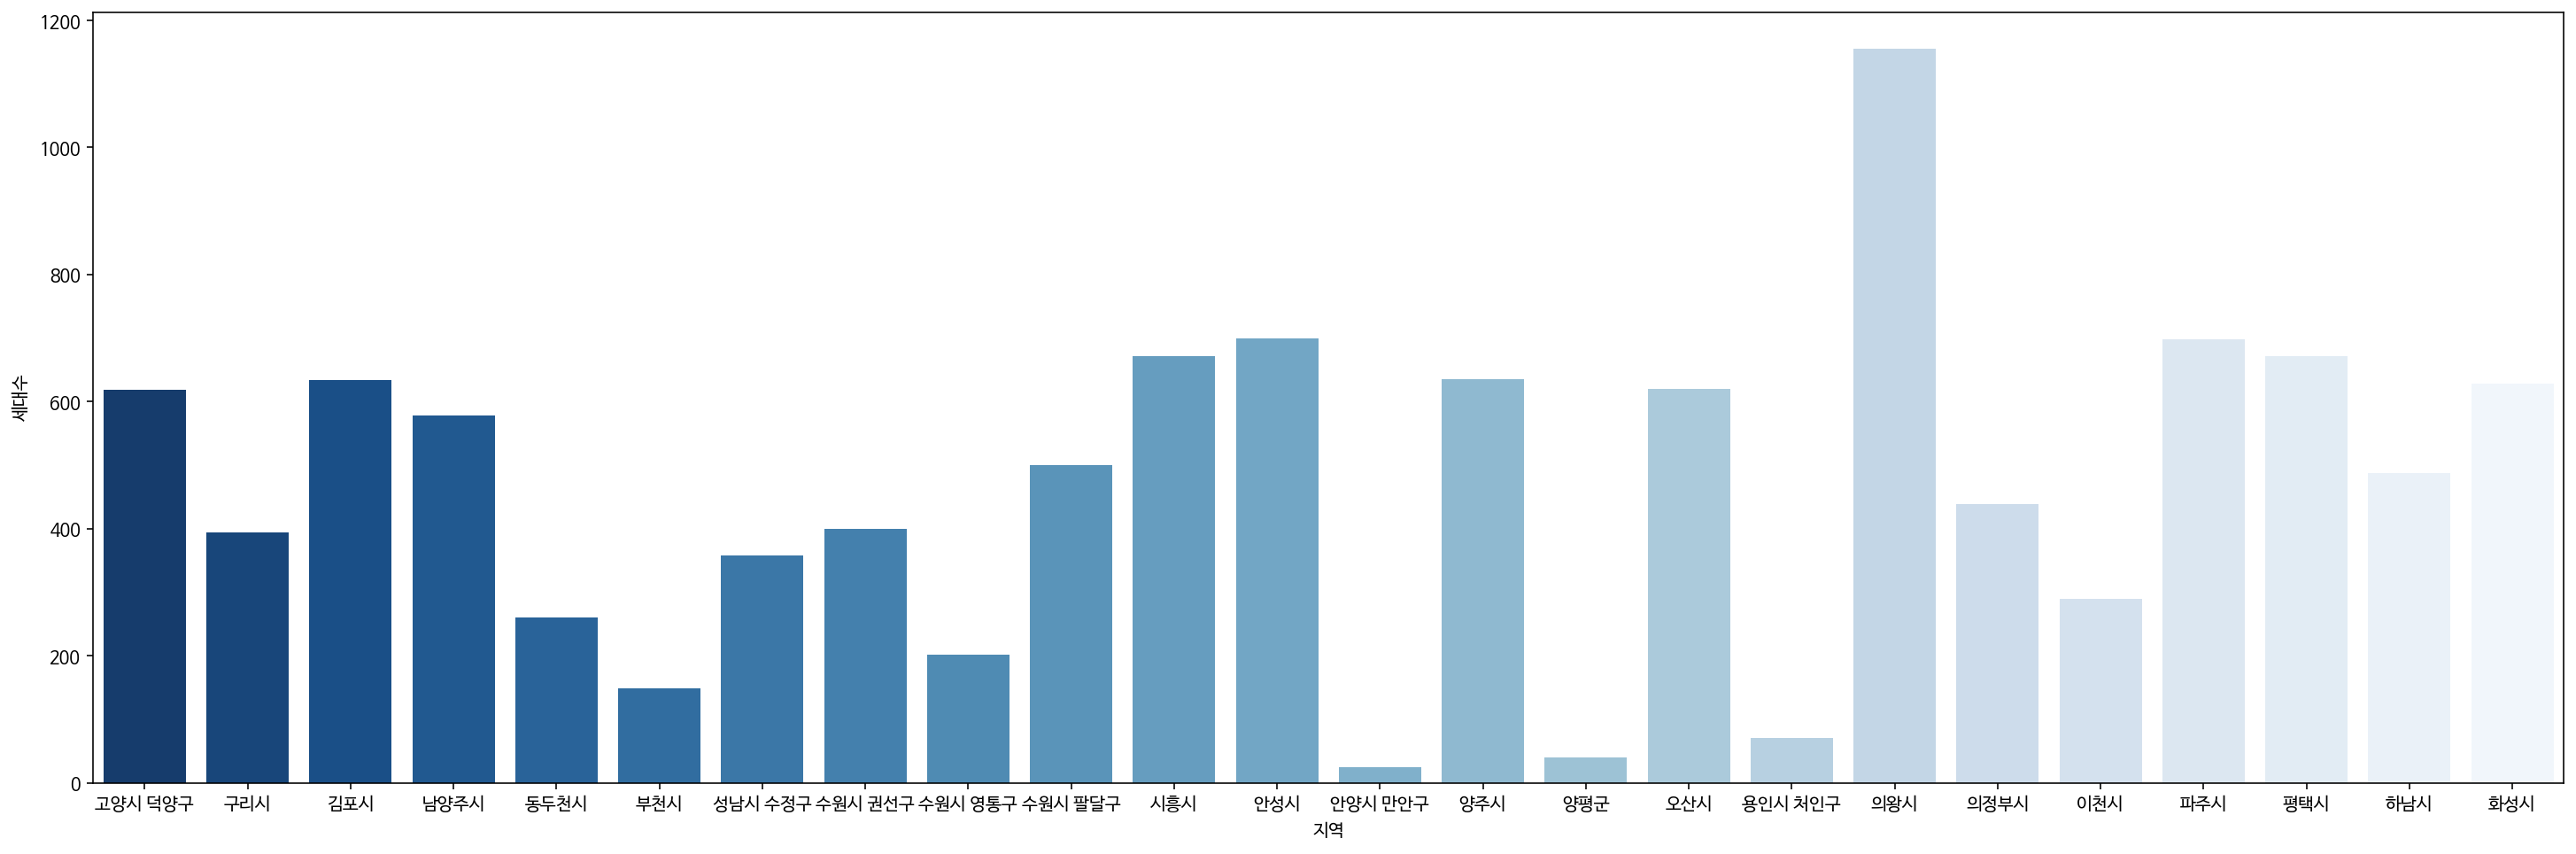

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(data=df, x='지역', y="세대수", palette="Blues_r", ci=None)

In [ ]:
df['세대수'].describe()

count      94.000000
mean      556.446809
std       442.155366
min         1.000000
25%       251.000000
50%       441.500000
75%       829.000000
max      2200.000000
Name: 세대수, dtype: float64

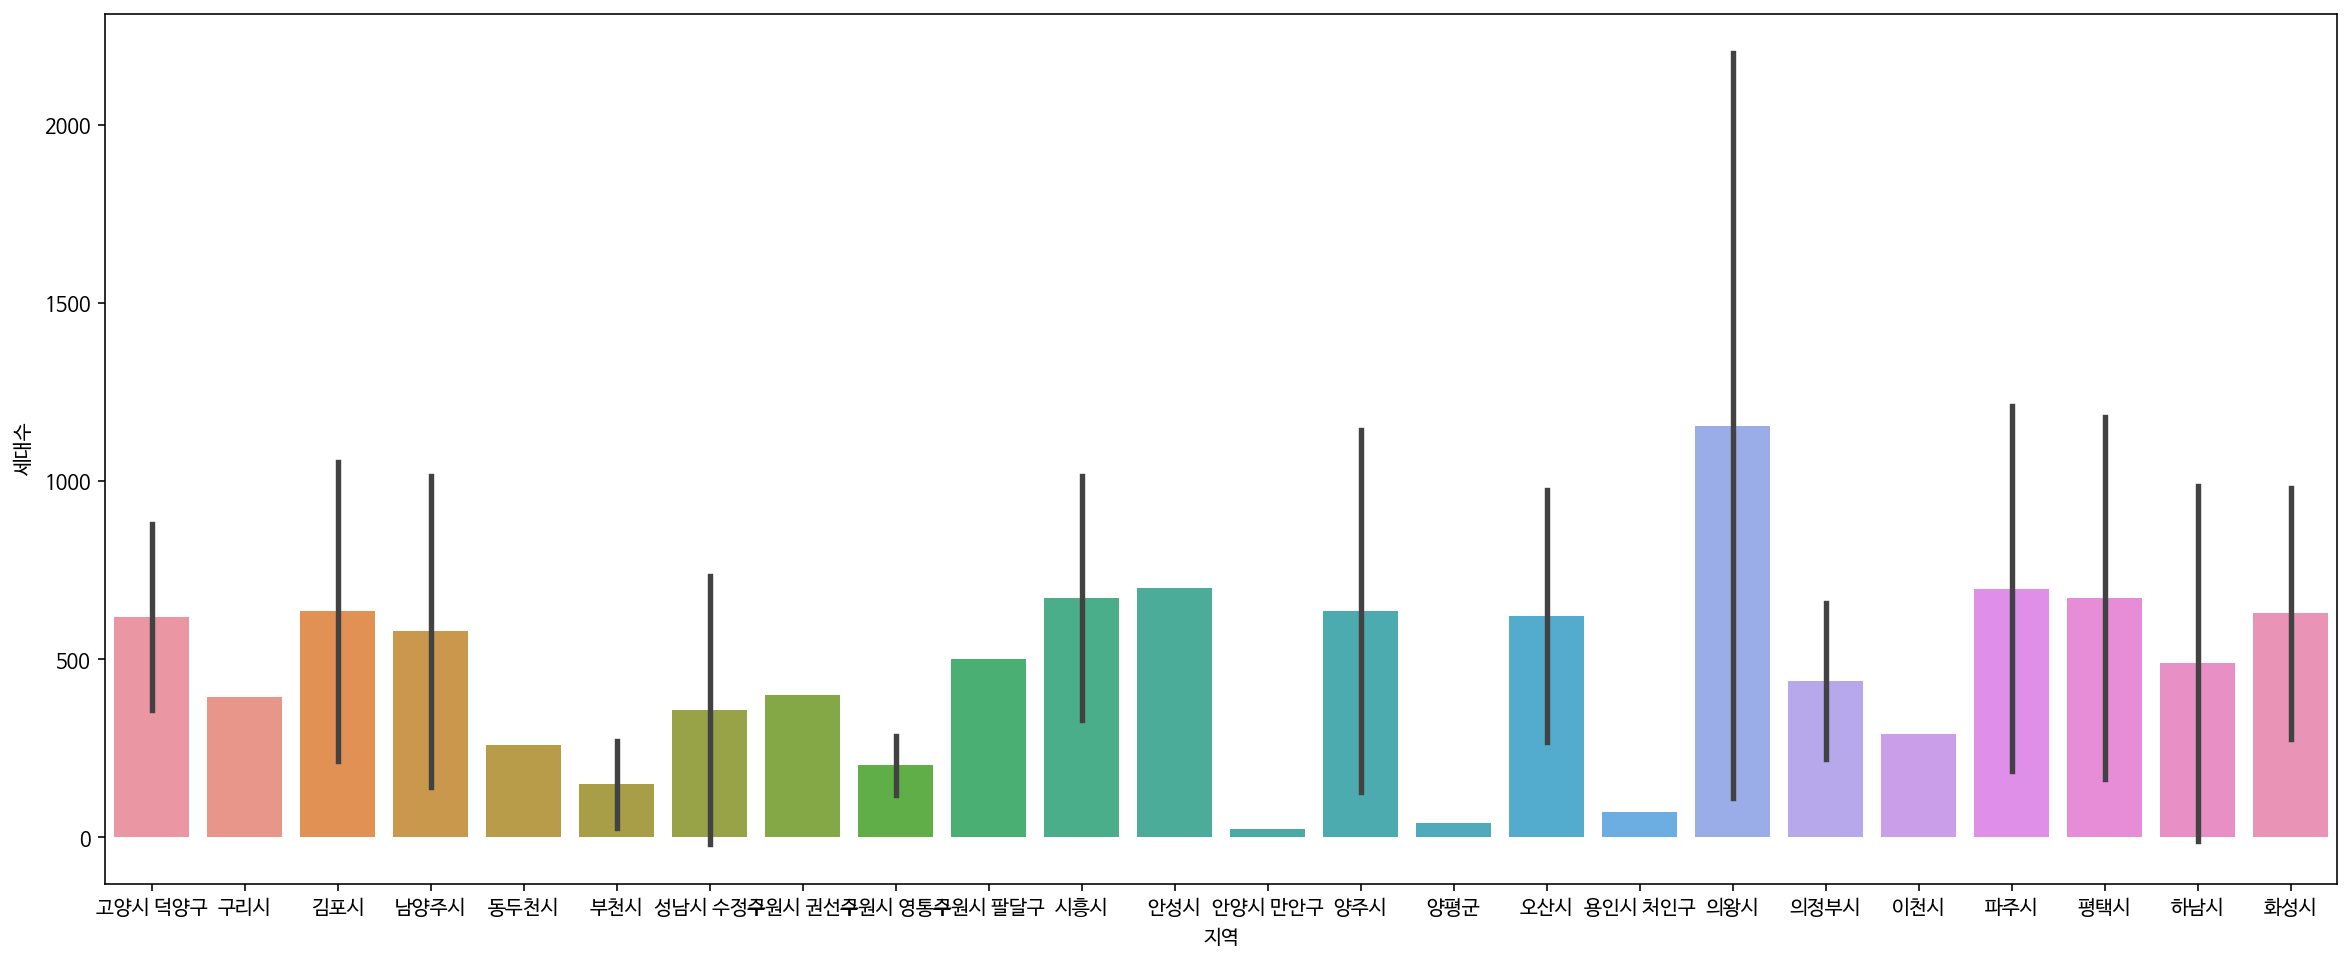

In [108]:
plt.figure(figsize=(20,8))
sns.barplot(data=df, x='지역', y='세대수', ci='sd')

ci; 표준편차를 나타낸다

In [111]:
df['세대수'].unique()

array([ 832,  250,  473,  947,  276,  777,  498,  890,  394,  443,  500,
        990,  450,  362,  196, 1500, 1220,  128,  870,  872,  352,   24,
        260,   26,  270, 1040,  200,  470,   16,   60,  400,  300,  204,
        100,  820,  197,  996,  699,  280,  508,  254,   40,  178,  448,
       1136,  720,   70, 2200,  110,  423,  166,  293,  812,  290,  580,
        242,  320, 1207, 1700, 1000,  298, 1600,  840,  295,  326,  672,
        167,  425,  170,    1, 1492,  602,  152,  410,  880,  850,  440,
        608, 1640,  390,   99,  696,  900,  862])

- 실수값을 카테고리 값으로 변환
https://datascienceschool.net/01%20python/04.04%20%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EB%A0%88%EC%9E%84%EC%9D%98%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A1%B0%EC%9E%91.html

In [124]:
bins =[1,500, 1000, 1500, 2000, 2500]
labels = ['500세대 이하', '1000세대 이하', '1500세대 이하', '2000세대 이하', '2500세대 이하']


In [125]:
df['house'] = pd.cut(df.세대수, bins, labels = labels)

In [126]:
df[['세대수', 'house']]

,세대수,house
0,832,1000세대 이하
1,250,500세대 이하
2,473,500세대 이하
3,947,1000세대 이하
4,276,500세대 이하
...,...,...
90,696,1000세대 이하
91,280,500세대 이하
92,820,1000세대 이하
93,900,1000세대 이하


In [129]:
df.head(3)


,지역,단지,세대수,주소,위도,경도,house
0,고양시 덕양구,삼송11단지,832,경기도 고양시 덕양구 원흥1로 25,37.650992,126.865491,1000세대 이하
1,고양시 덕양구,고양지축 A-1블록 신혼희망타운 행복주택,250,경기도 고양시 덕양구 오부자로 99,37.653331,126.921037,500세대 이하
2,고양시 덕양구,고양지축 A-4BL 행복주택,473,경기도 고양시 덕양구 오부자로 43,37.654038,126.914946,500세대 이하


In [128]:
df['house'].describe()

count           93
unique           5
top       500세대 이하
freq            56
Name: house, dtype: object

In [131]:
df.groupby(['house'])['지역'].count()

house
500세대 이하     56
1000세대 이하    26
1500세대 이하     7
2000세대 이하     3
2500세대 이하     1
Name: 지역, dtype: int64

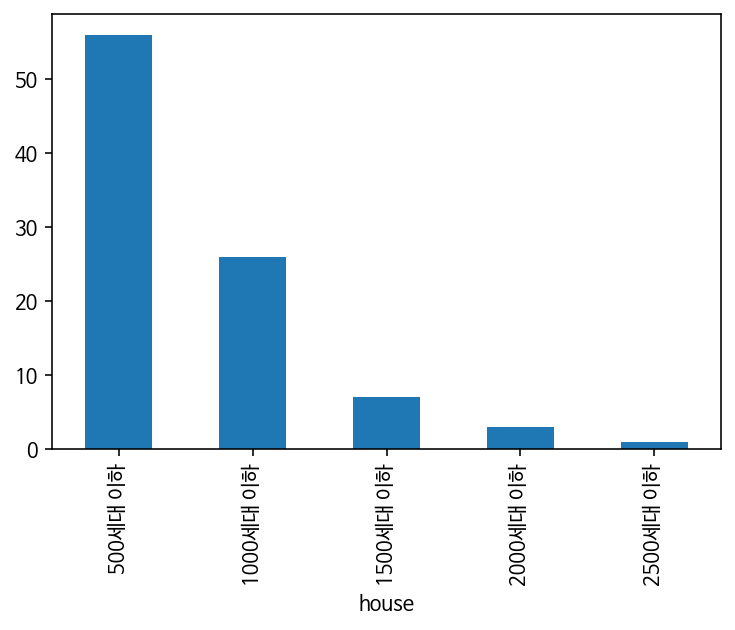

In [136]:
house_g = df.groupby(['house'])['지역'].count()
house_g.plot.bar()

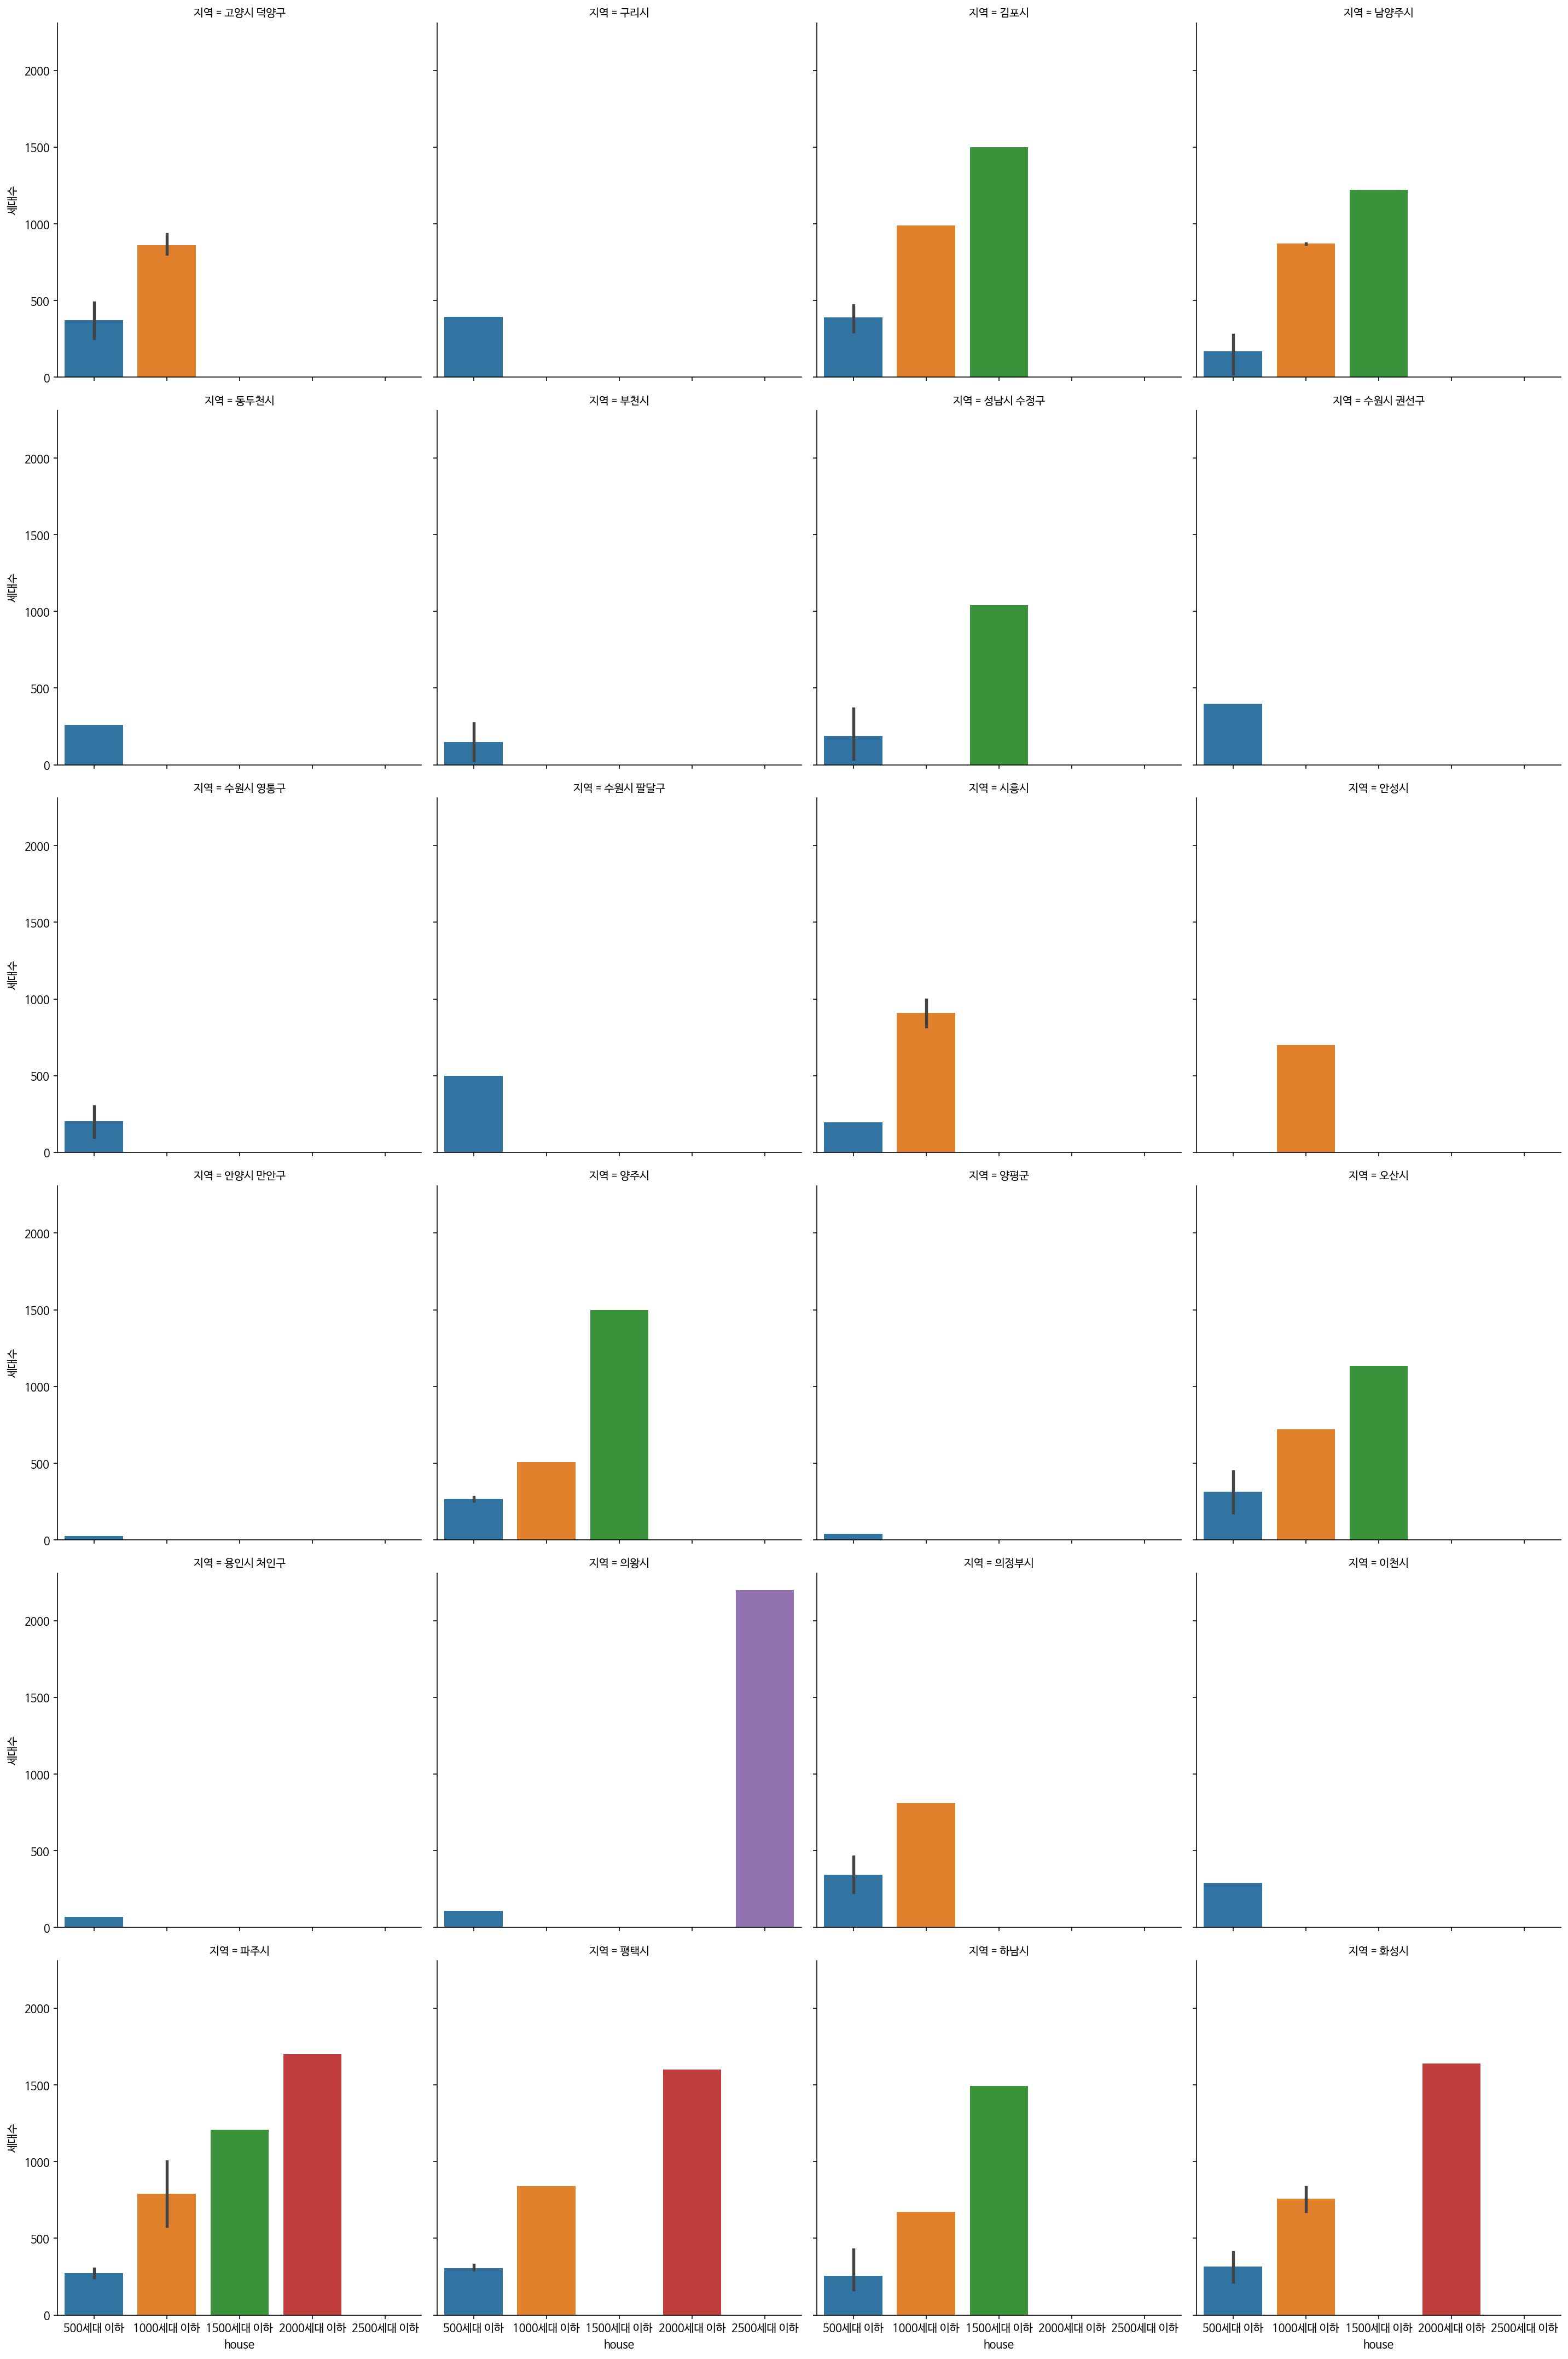

In [140]:
sns.catplot(data=df, x='house', y='세대수', kind='bar', col='지역', col_wrap=4)

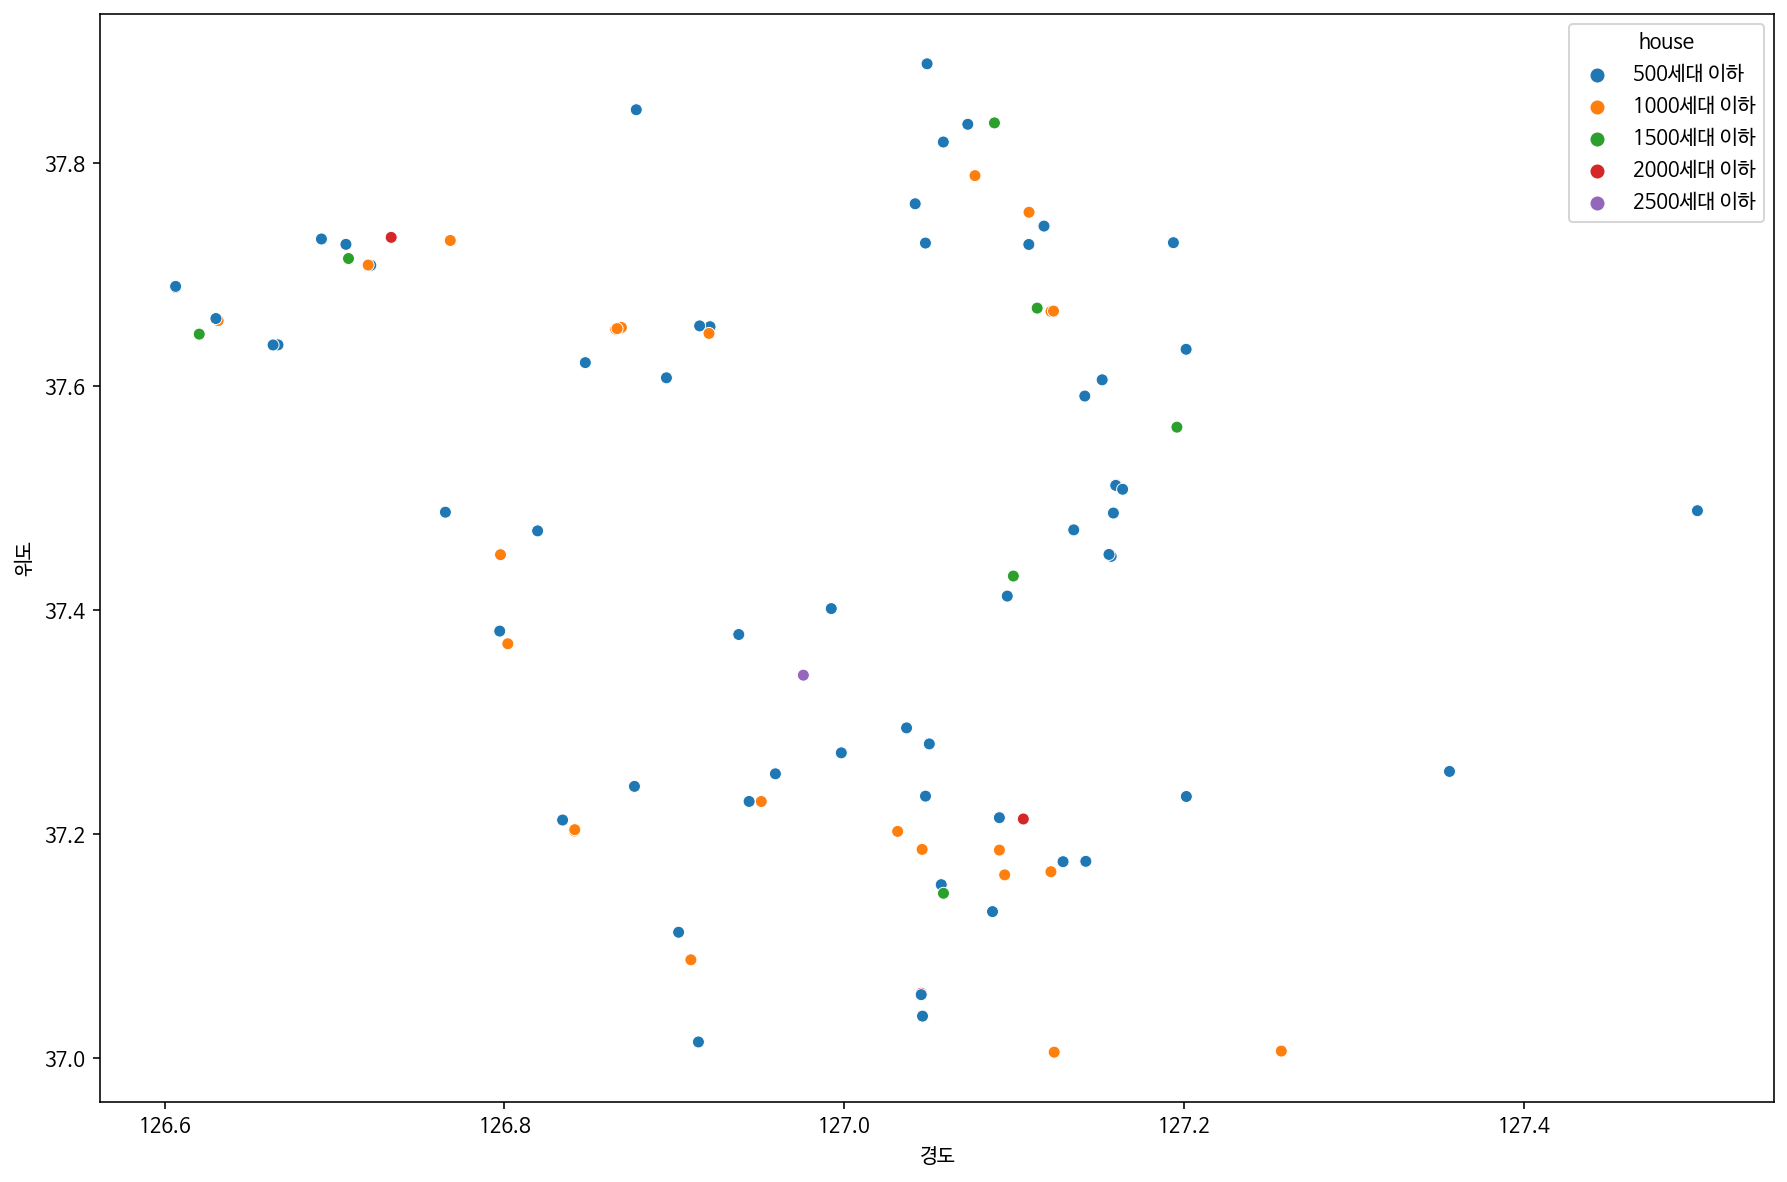

In [144]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='경도', y='위도', hue='house')